# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
def simulate_dice_rolls():
    rolls = [random.choice(range(1, 7)) for _ in range(10)]
    df = pd.DataFrame({'Roll': rolls})
    return df

dice_rolls_df = simulate_dice_rolls()

print(dice_rolls_df)


   Roll
0     6
1     4
2     3
3     3
4     1
5     1
6     2
7     5
8     4
9     5


#### 2.- Plot the results sorted by value.

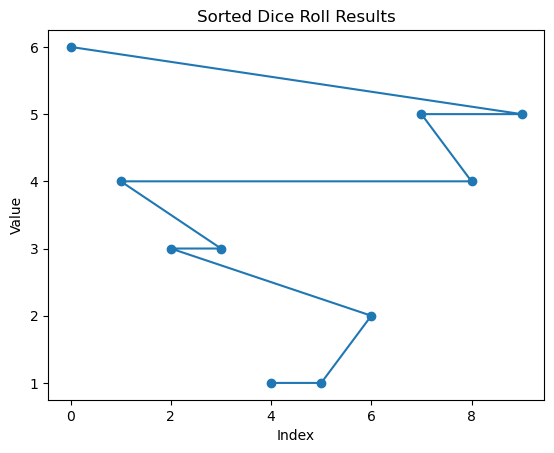

In [6]:
# Sort the dataframe by 'Roll' column
sorted_df = dice_rolls_df.sort_values('Roll')

# Plot the sorted results
plt.plot(sorted_df.index, sorted_df['Roll'], marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sorted Dice Roll Results')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

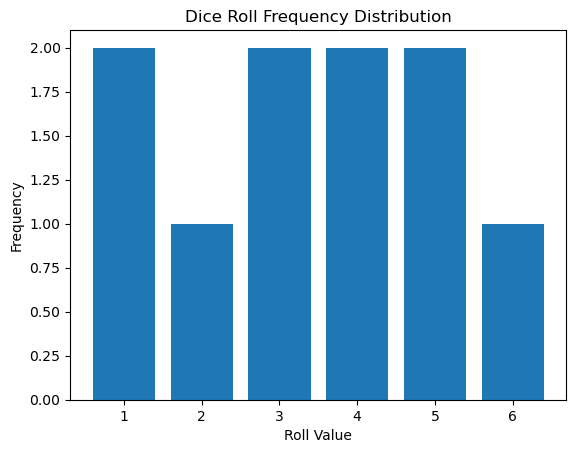

In [7]:
# Calculate the frequency distribution
frequency = dice_rolls_df['Roll'].value_counts().sort_index()

# Plot the frequency distribution
plt.bar(frequency.index, frequency.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency Distribution')
plt.show()

In [ ]:
"""
The first plot represents more of a visualization of a roll values sorted in ascending order. Its a visual representations
of how the roll values are distributed across the ten rolls.
The second plot represents more clear vision of how frequent each rolls are. So we can clearly see how many times they
occured in one rolling.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [34]:
def calculate_mean(observations):
    total_sum = 0
    num_observations = 0

    for observation in observations:
        total_sum += observation
        num_observations += 1

    mean = total_sum / num_observations
    return mean


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [38]:
def calculate_mean_from_frequency(frequency):
    total_sum = 0
    total_observations = 0

    for value, count in frequency.items():
        total_sum += value * count
        total_observations += count

    mean = total_sum / total_observations
    return mean


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [39]:
def calculate_median(observations):
    sorted_observations = sorted(observations)
    num_observations = len(sorted_observations)

    # Case 1: Odd number of observations
    if num_observations % 2 != 0:
        median_index = num_observations // 2
        median = sorted_observations[median_index]
    
    # Case 2: Even number of observations
    else:
        upper_median_index = num_observations // 2
        lower_median_index = upper_median_index - 1
        median = (sorted_observations[lower_median_index] + sorted_observations[upper_median_index]) / 2

    return median


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
def calculate_quartiles(observations):
    sorted_observations = sorted(observations)
    num_observations = len(sorted_observations)

    # Calculate Q2 (median)
    q2 = calculate_median(sorted_observations)

    # Calculate Q1
    if num_observations % 2 != 0:
        lower_half = sorted_observations[:num_observations // 2]
    else:
        lower_half = sorted_observations[:num_observations // 2]

    q1 = calculate_median(lower_half)

    # Calculate Q3
    if num_observations % 2 != 0:
        upper_half = sorted_observations[num_observations // 2 + 1:]
    else:
        upper_half = sorted_observations[num_observations // 2:]

    q3 = calculate_median(upper_half)

    # Calculate Q4
    q4 = sorted_observations[-1]

    return q1, q2, q3, q4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

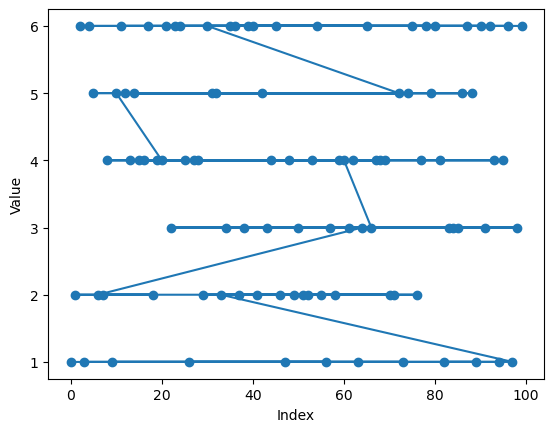

    Unnamed: 0  roll  value
0            0     0      1
1            1     1      2
2            2     2      6
3            3     3      1
4            4     4      6
..         ...   ...    ...
95          95    95      4
96          96    96      6
97          97    97      1
98          98    98      3
99          99    99      6

[100 rows x 3 columns]


In [61]:
data = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week03/Week03/Descriptive-Stats/data/roll_the_dice_hundred.csv")




sorted_data = data.sort_values('value')


plt.plot(sorted_data.index, sorted_data['value'], marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()
print(data)

In [62]:
"""
We can see how many times each value is represented in the dataframe. We can see also on what place in the dataframe is each value.
"""

'\nWe can see how many times each value is represented in the dataframe. We can see also on what place in the dataframe is each value.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [63]:
data.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [64]:
calculate_mean(data["value"])


3.74

#### 3.- Now, calculate the frequency distribution.


In [65]:
calculate_mean_from_frequency(data["value"])

49.29946524064171

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

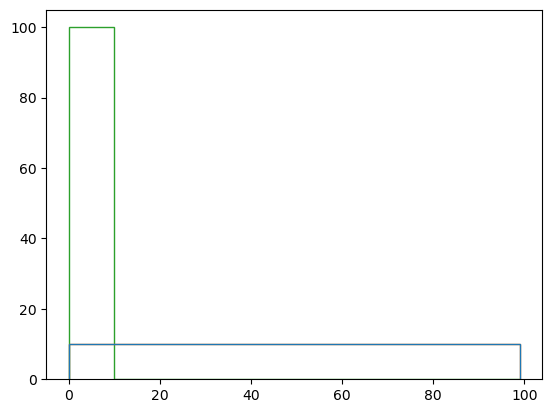

In [67]:
plt.hist(data, bins = 10, histtype = 'step')
plt.show()


In [76]:
df = data[data['value']>6]
df

,Unnamed: 0,roll,value


In [ ]:
"""
We distributed numbers into 10 bins, and we can see that we have numbers only in the first bin which appears to be numbers
that are smaller than 10. When i took the closer look on column there are no numbers bigger than 6.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

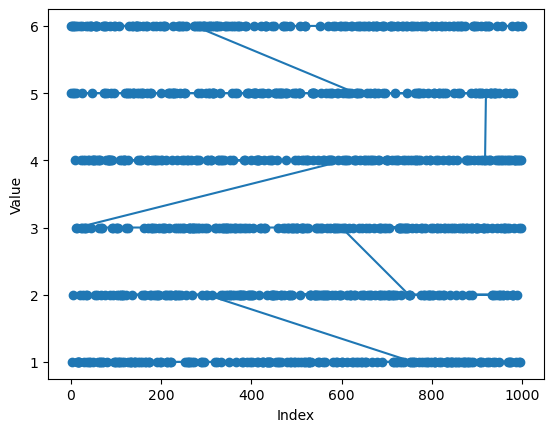

     Unnamed: 0  roll  value
0             0     0      5
1             1     1      6
2             2     2      1
3             3     3      6
4             4     4      5
..          ...   ...    ...
995         995   995      1
996         996   996      4
997         997   997      4
998         998   998      3
999         999   999      6

[1000 rows x 3 columns]


In [79]:
data = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week03/Week03/Descriptive-Stats/data/roll_the_dice_thousand.csv")
data
sorted_data = data.sort_values('value')


plt.plot(sorted_data.index, sorted_data['value'], marker='o')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()
print(data)



In [ ]:
"""
In the comparison visualy its not very clear as with hundreds. If the picture scaled the same way the number of the inputs
scaled then it would be much cleaner.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

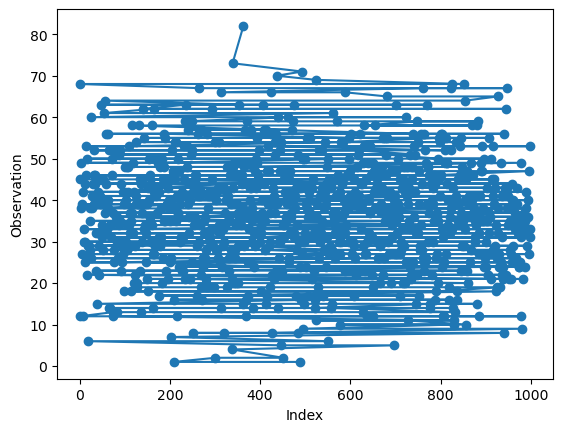

     observation
0           68.0
1           12.0
2           45.0
3           38.0
4           49.0
..           ...
995         27.0
996         47.0
997         53.0
998         33.0
999         31.0

[1000 rows x 1 columns]


In [83]:
data = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week03/Week03/Descriptive-Stats/data/ages_population.csv")

sorted_data = data.sort_values('observation')


plt.plot(sorted_data.index, sorted_data['observation'], marker='o')
plt.xlabel('Index')
plt.ylabel('Observation')
plt.show()
print(data)

In [ ]:
"""
could be something like 35-45????
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [84]:
calculate_mean(data['observation'])



36.56

In [ ]:
"""
it does, i guessed 35-45.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

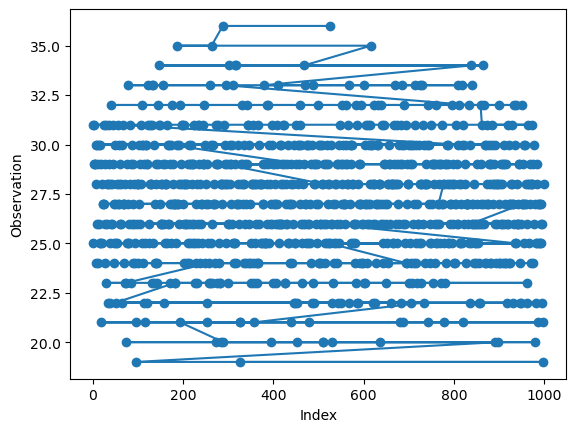

     observation
0           25.0
1           31.0
2           29.0
3           31.0
4           29.0
..           ...
995         26.0
996         22.0
997         21.0
998         19.0
999         28.0

[1000 rows x 1 columns]


In [87]:
data = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week03/Week03/Descriptive-Stats/data/ages_population2.csv")
calculate_mean_from_frequency(data["observation"])

sorted_data = data.sort_values('observation')


plt.plot(sorted_data.index, sorted_data['observation'], marker='o')
plt.xlabel('Index')
plt.ylabel('Observation')
plt.show()
print(data)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
There is a big difference, the second graph is much less wide.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [88]:
calculate_mean(data['observation'])

27.155

In [ ]:
"""
We can see the mean here is 27.155 in comparison to 36.56. The reason is apparent since the first mean has much wider
range of numbers from 0-80, on  the other hand the second one is from range something like 19 to something like 35.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

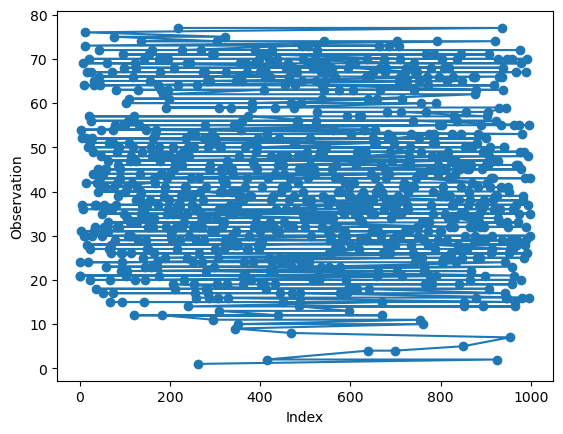

     observation
0           21.0
1           21.0
2           24.0
3           31.0
4           54.0
..           ...
995         16.0
996         55.0
997         30.0
998         35.0
999         43.0

[1000 rows x 1 columns]


In [90]:
data = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week03/Week03/Descriptive-Stats/data/ages_population3.csv")

sorted_data = data.sort_values('observation')


plt.plot(sorted_data.index, sorted_data['observation'], marker='o')
plt.xlabel('Index')
plt.ylabel('Observation')
plt.show()
print(data)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [91]:
calculate_mean(data['observation'])

41.989

In [ ]:
"""
Well we can see that even there are much fewer numbers in the range 0-10 which is taking the mean up. But the main reason
is significantly increased number of occurences in the range 70-80.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""